# FINAL PROJECT

# Data Preparation

Import library yang diperlukan:

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import math
import statistics
import scipy.stats
pd.set_option('display.max.columns',None)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

link download dataset: https://www.kaggle.com/sakshigoyal7/credit-card-customers

Proses load dataset:

In [2]:
df = pd.read_csv('./final project/dataset/bank churners/BankChurners.csv')
print ('Data read into a pandas dataframe!')
print('===================================')
df

Data read into a pandas dataframe!


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


Melihat 5 baris teratas pada df:

In [3]:
df_top5 = df.head(5)
print ('Top rows data:')
print('==============')
df_top5

Top rows data:


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Melihat 5 baris terbawah pada df:

In [4]:
df_tail5 = df.tail(5)
print ('Tail rows data:')
print('===============')
df_tail5

Tail rows data:


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


Eliminasi dua kolom terakhir/yang tidak diperlukan. Disini dua kolom terakhir dan kolom CLIENTNUM yang di drop.

In [5]:
kolom_drop = ['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
df.drop(kolom_drop, inplace=True, axis=1)

Hitung ukuran dataframe df:

In [6]:
# shape dataframe
df_shape = df.shape
print('Didapatkan ukuran df:  ')
print('=====================')
df_shape

Didapatkan ukuran df:  


(10127, 20)

Mengetahui informasi type data masing-masing kolom data df:

In [7]:
print('Informasi mengenai tipe data: ')
print('=============================')
print(' ')
df.info()

Informasi mengenai tipe data: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10

Mengetahui jenis dari type data object:

In [8]:
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
Attrition_Flag 2
Gender 2
Education_Level 7
Marital_Status 4
Income_Category 6
Card_Category 4


dalam kolom attrition flag ada dua jenis kelompok yaitu existing dan attrited

dalam kolom gender ada dua jenis kelompok yaitu female dan male

dalam kolom education level ada 7 kelompok, dalam kolom marital status ada 4 kelompok, kolom income category ada 6 kelompok, dan kolom card category ada 4 kelompok

Mengetahui apakah ada missing value pada df:

In [9]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

Empty DataFrame
Columns: []
Index: [percent missing, how many missing]


tidak ada missing value

Mengetahui apakah ada duplikasi:

In [10]:
print('Duplikasi: ',sum(df.duplicated()))
#print(sum(df.duplicated()))

Duplikasi:  0


# EDA

Summary untuk data berjenis kategori:

In [11]:
list_kategori = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

In [12]:
print('Rekap data type kategori:')
print('=========================')
print('')

for i in list_kategori:
    print(df[i].value_counts(),'\n')

Rekap data type kategori:

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 

F    5358
M    4769
Name: Gender, dtype: int64 

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64 

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64 

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64 

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64 



Disini tidak ada nilai NaN. Lalu untuk beberapa kategori ada "unknown", namun tidak dapat dihapus karena jumlahnya yang cukup besar.

Summary untuk data berjenis numerik:

In [13]:
print('Rekap data type numerik:')
print('========================')
print('')

df.describe()

Rekap data type numerik:



,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


tabel di atas adalah ringkasan/rangkuman untuk type data numerik yaitu mean, standar deviasi, min dan maz, serta Q1, Q2, dan Q3

Pie Chart untuk Kolom Kategori:



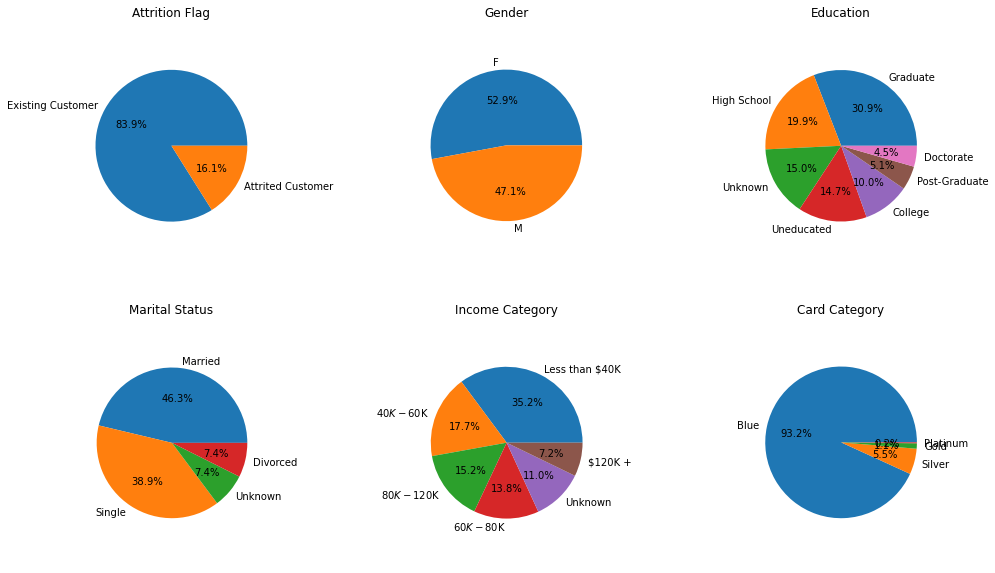

In [14]:
print('Pie Chart untuk Kolom Kategori:')
print('================================')
print('')

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
df_att = df['Attrition_Flag'].value_counts()
df_att.plot(kind='pie',autopct='%1.1f%%',labels=df_att.index)
plt.axis('equal')
plt.ylabel('')
plt.title('Attrition Flag')

plt.subplot(2,3,2)
df_gender = df['Gender'].value_counts()
df_gender.plot(kind='pie',autopct='%1.1f%%',labels=df_gender.index)
plt.axis('equal')
plt.ylabel('')
plt.title('Gender')


plt.subplot(2,3,3)
df_edu = df['Education_Level'].value_counts()
df_edu.plot(kind='pie',autopct='%1.1f%%',labels=df_edu.index)
plt.axis('equal')
plt.ylabel('')
plt.title('Education')


plt.subplot(2,3,4)
df_married = df['Marital_Status'].value_counts()
df_married.plot(kind='pie',autopct='%1.1f%%',labels=df_married.index)
plt.axis('equal')
plt.ylabel('')
plt.title('Marital Status')


plt.subplot(2,3,5)
df_income = df['Income_Category'].value_counts()
df_income.plot(kind='pie',autopct='%1.1f%%',labels=df_income.index)
plt.axis('equal')
plt.ylabel('')
plt.title('Income Category')


plt.subplot(2,3,6)
df_card = df['Card_Category'].value_counts()
df_card.plot(kind='pie',autopct='%1.1f%%',labels=df_card.index)
plt.axis('equal')
plt.ylabel('')
plt.title('Card Category')



plt.subplots_adjust(wspace=1)
plt.show()

In [15]:
kategori = dict()
for col in df.columns:
    if df[col].dtype == 'object':
        kategori[col] = df[col].unique()
kategori.keys()

dict_keys(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])

Bar chart untuk Attrited dan Existing Customer menurut Gender, Education_Level, Marital_Status, Income_Category, Card_Category:



C:\Users\Nurul Tyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nurul Tyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nurul Tyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nurul T

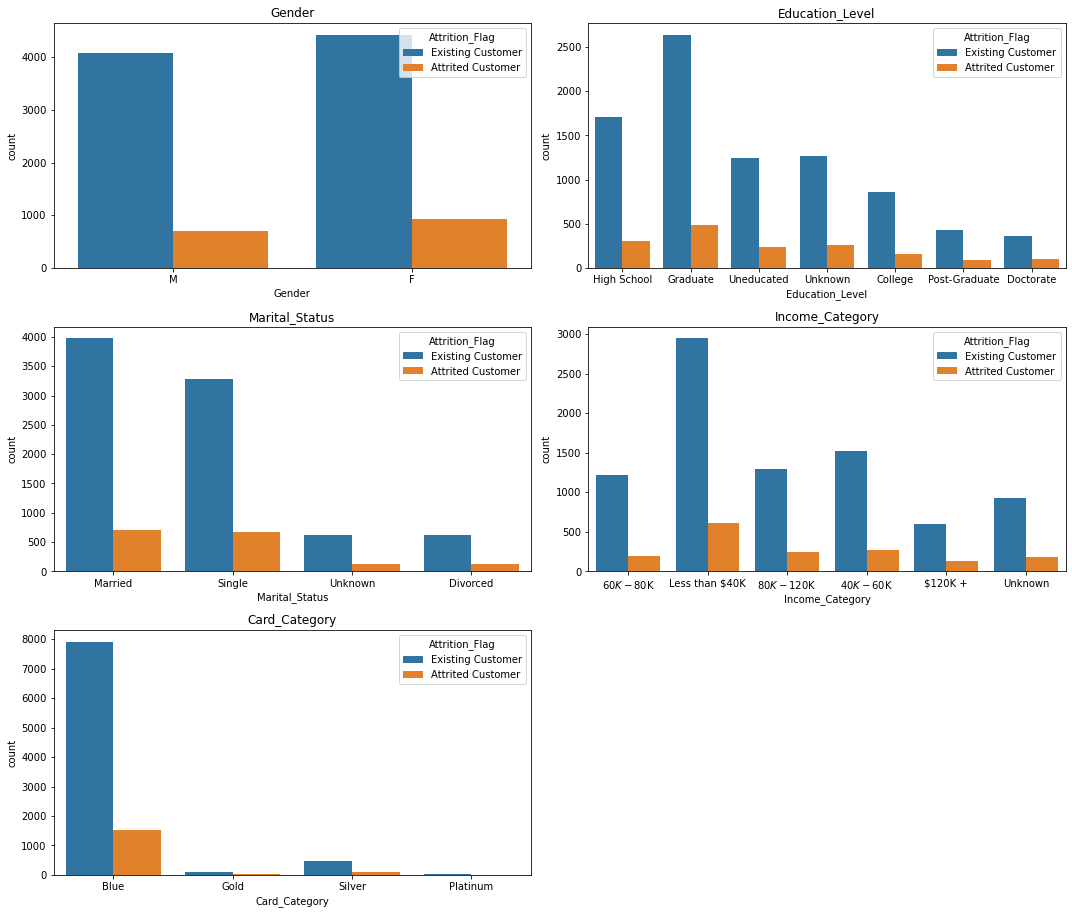

In [16]:
print('Bar chart untuk Attrited dan Existing Customer menurut Gender, Education_Level, Marital_Status, Income_Category, Card_Category:')
print('==========================================================================================================================')
print('')

i=1
n = 6
plt.figure(figsize=(15,25))
for col in kategori.keys():
    if col != 'Attrition_Flag':
        plt.subplot(n,2,i)
        plt.tight_layout()
        plt.title(col)
        sns.countplot(df[col], hue = df['Attrition_Flag'])
        i=i+1

In [17]:
numerik = dict()
for col in df.columns:
    if df[col].dtype != 'object':
        numerik[col] = df[col].unique()
numerik.keys()

dict_keys(['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'])

C:\Users\Nurul Tyas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nurul Tyas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nurul Tyas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

C:\Users\Nurul Tyas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nurul Tyas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nurul Tyas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

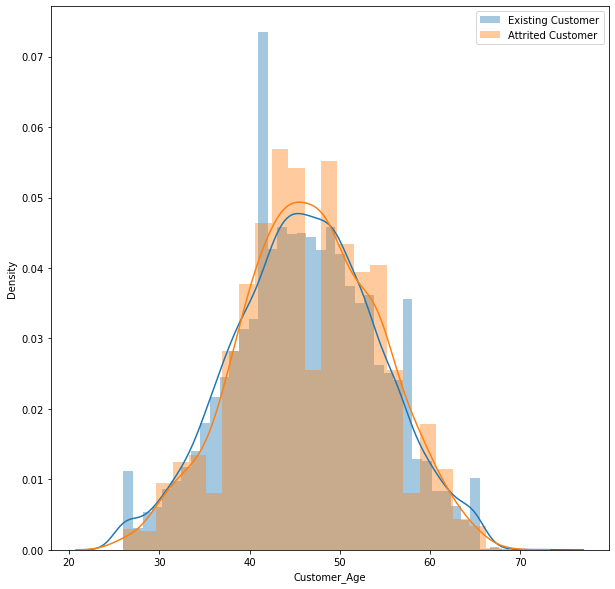

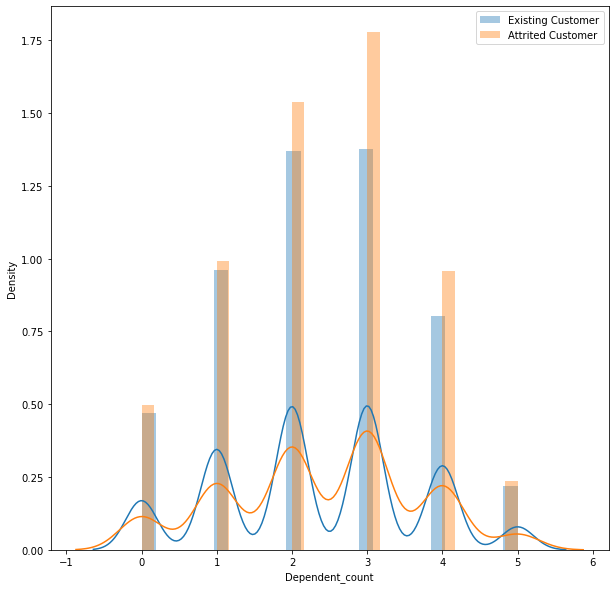

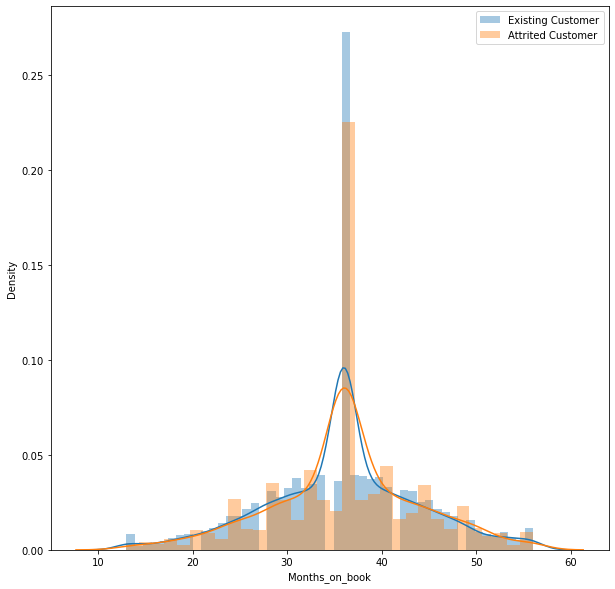

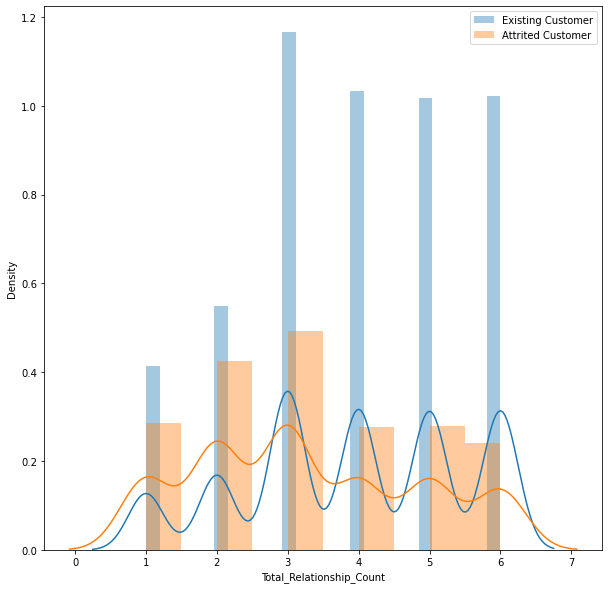

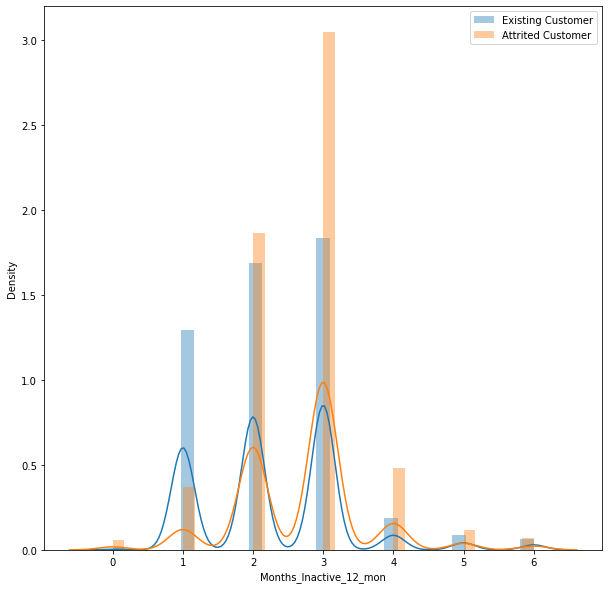

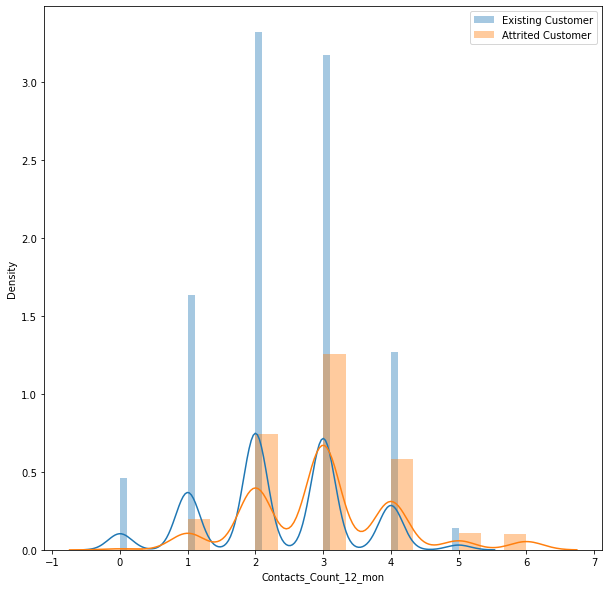

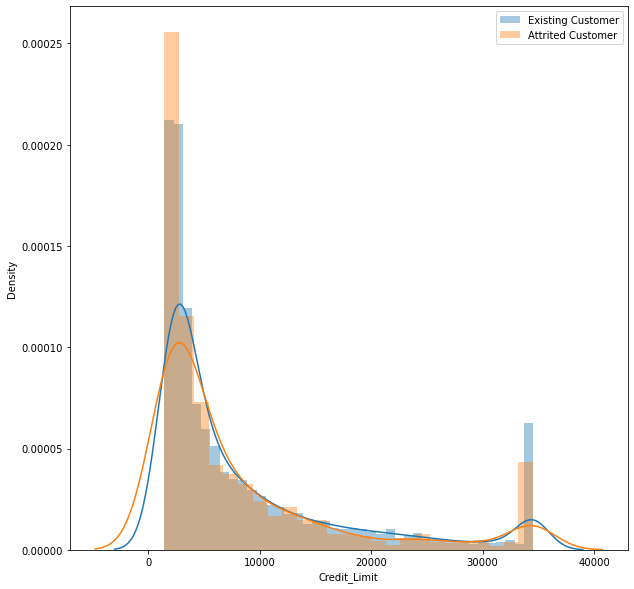

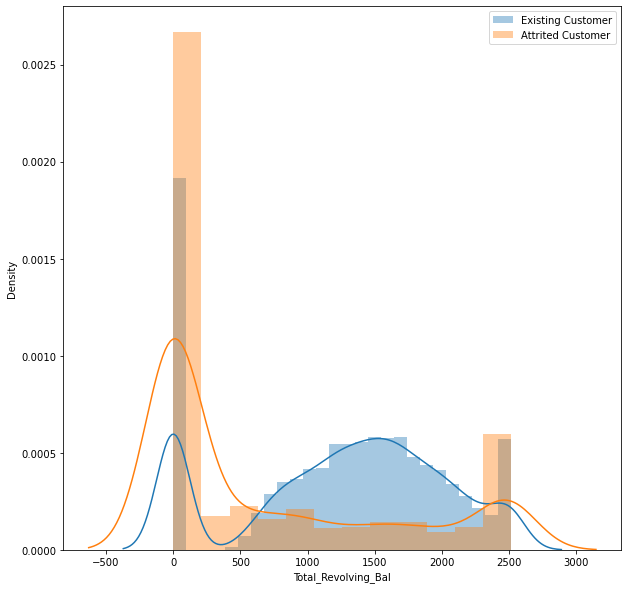

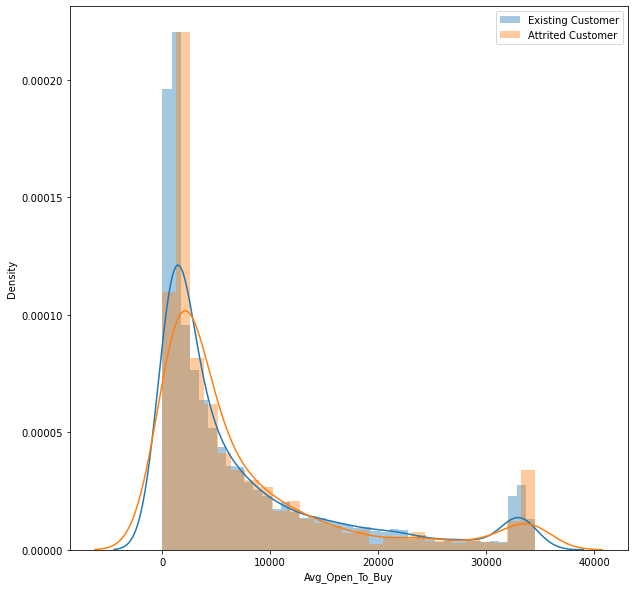

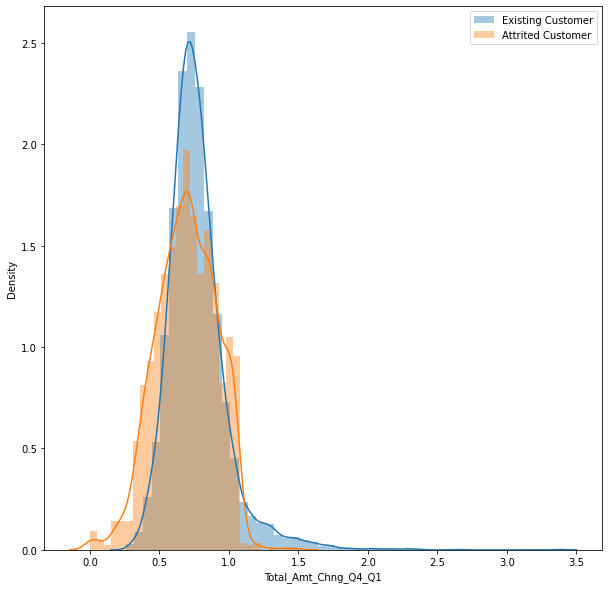

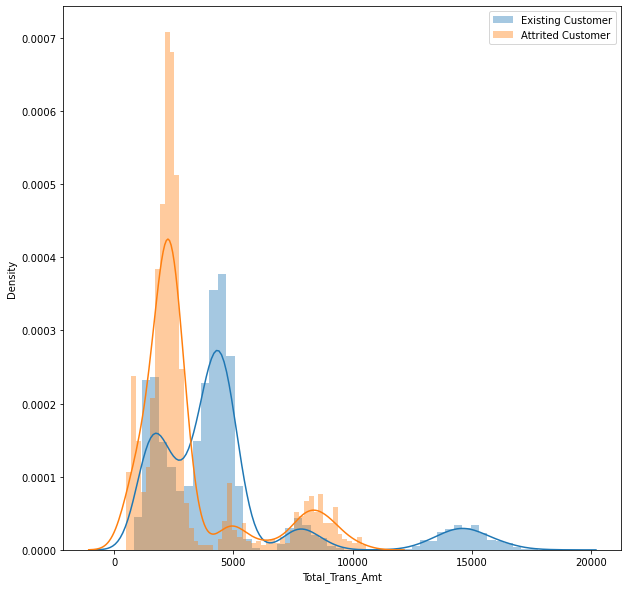

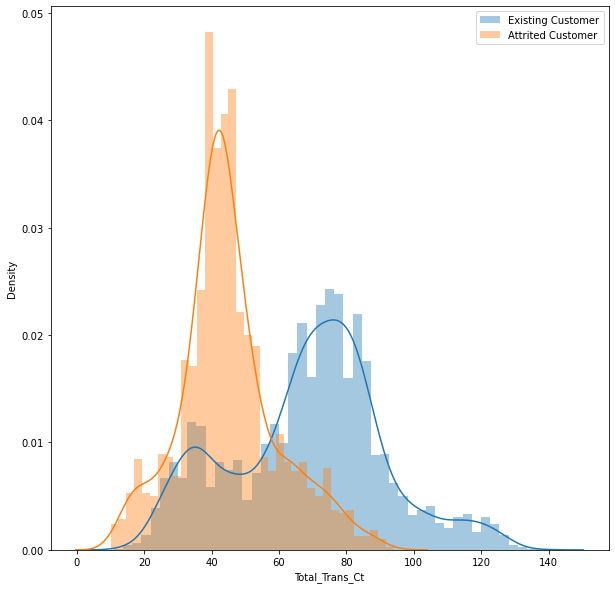

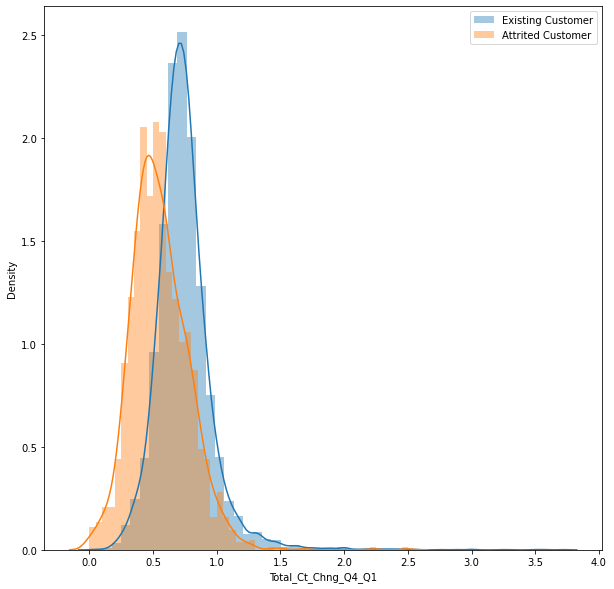

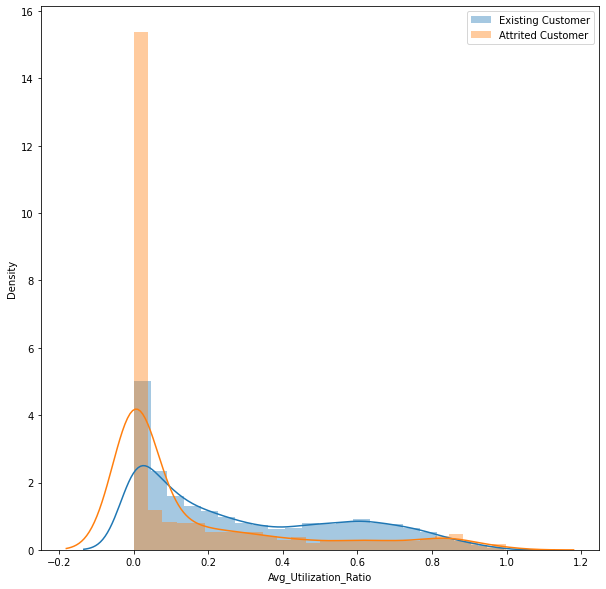

In [18]:
df_exist = df[df['Attrition_Flag'] == 'Existing Customer']
df_att   = df[df['Attrition_Flag'] == 'Attrited Customer']
m = len(numerik.keys())

for col in numerik.keys():
    plt.figure(figsize=(10,10))
    sns.distplot(df_exist[col], label = 'Existing Customer')
    sns.distplot(df_att[col],   label = 'Attrited Customer')
    plt.legend()

In [19]:
print('Gambar di atas merupakan Plot Histogram untuk data-data numerik')
print('===============================================================')
print('')

Gambar di atas merupakan Plot Histogram untuk data-data numerik



Proses mengubah data kategori menjadi numerik

Misal: Attrited Customer = 0, dan Existing Customer = 1

In [20]:
# Proses econder

df_attflag = df['Attrition_Flag'].values
att_encoder = LabelEncoder().fit(df_attflag)
Attrition_Flag_Konversi = att_encoder.transform(df_attflag)

df_genderflag = df['Gender'].values
gender_encoder = LabelEncoder().fit(df_genderflag)
Gender_Konversi = gender_encoder.transform(df_genderflag)

df_edulev = df['Education_Level'].values
edu_encoder = LabelEncoder().fit(df_edulev)
Education_Level_Konversi = edu_encoder.transform(df_edulev)

df_marstat = df['Marital_Status'].values
mar_encoder = LabelEncoder().fit(df_marstat)
Marital_Status_Konversi = mar_encoder.transform(df_marstat)

df_inco = df['Income_Category'].values
inco_encoder = LabelEncoder().fit(df_inco)
Income_Category_Konversi = inco_encoder.transform(df_inco)

df_cardcat = df['Card_Category'].values
card_encoder = LabelEncoder().fit(df_cardcat)
Card_Category_Konversi = card_encoder.transform(df_cardcat)

Penambahan kolom-kolom konversi pada dataframe df

In [21]:
print('Penambahan Kolom df')

df['Attrition_Flag_Konversi'] = Attrition_Flag_Konversi
df['Gender_Konversi'] = Gender_Konversi
df['Education_Level_Konversi'] = Education_Level_Konversi
df['Marital_Status_Konversi'] = Marital_Status_Konversi
df['Income_Category_Konversi'] = Income_Category_Konversi
df['Card_Category_Konversi'] = Card_Category_Konversi
df.head()

Penambahan Kolom df


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Konversi,Gender_Konversi,Education_Level_Konversi,Marital_Status_Konversi,Income_Category_Konversi,Card_Category_Konversi
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,1,3,1,2,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,2,2,4,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,1,2,1,3,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,3,3,4,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,1,5,1,2,0


In [22]:
# print('Hasil Encoder:')
print('')

att_group = df.groupby(by=['Attrition_Flag','Attrition_Flag_Konversi'])['Attrition_Flag_Konversi'].count()
print(att_group)
print('-----------------------------------------------------------')
print('')

gender_group = df.groupby(by=['Gender','Gender_Konversi'])['Gender_Konversi'].count()
print(gender_group)
print('-----------------------------------------------------------')
print('')


edu_group = df.groupby(by=['Education_Level','Education_Level_Konversi'])['Education_Level_Konversi'].count()
print(edu_group)
print('-----------------------------------------------------------')
print('')

marit_group = df.groupby(by=['Marital_Status','Marital_Status_Konversi'])['Marital_Status_Konversi'].count()
print(marit_group)
print('-----------------------------------------------------------')
print('')

income_group = df.groupby(by=['Income_Category','Income_Category_Konversi'])['Income_Category_Konversi'].count()
print(income_group)
print('-----------------------------------------------------------')
print('')

card_group = df.groupby(by=['Card_Category','Card_Category_Konversi'])['Card_Category_Konversi'].count()
print(card_group)
print('-----------------------------------------------------------')
print('')


Attrition_Flag     Attrition_Flag_Konversi
Attrited Customer  0                          1627
Existing Customer  1                          8500
Name: Attrition_Flag_Konversi, dtype: int64
-----------------------------------------------------------

Gender  Gender_Konversi
F       0                  5358
M       1                  4769
Name: Gender_Konversi, dtype: int64
-----------------------------------------------------------

Education_Level  Education_Level_Konversi
College          0                           1013
Doctorate        1                            451
Graduate         2                           3128
High School      3                           2013
Post-Graduate    4                            516
Uneducated       5                           1487
Unknown          6                           1519
Name: Education_Level_Konversi, dtype: int64
-----------------------------------------------------------

Marital_Status  Marital_Status_Konversi
Divorced        0         

Pilih features yang diinginkan untuk digunakan pada classification

In [23]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Konversi,Gender_Konversi,Education_Level_Konversi,Marital_Status_Konversi,Income_Category_Konversi,Card_Category_Konversi
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,1,3,1,2,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,2,2,4,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,1,2,1,3,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,3,3,4,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,1,5,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,1,1,2,2,1,0
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,1,6,0,1,0
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,0,3,1,4,0
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0,1,2,3,1,0


# Proses Classification

In [24]:
print('Data Featute yang digunakan untuk case ini adalah:')
print('1. Customer_Age: Customer Age')
print('2. Credit_Limit: Credit Limit pada Kartu Kredit')
print('3. Total_Revolving_Bal: Total Revolving Balance pada Kartu Kredit')
print('4. Total_Trans_Amt: Total Transaction Amount 12 Bulan')
print('5. Card_Category_Konversi: Jenis Kartu')
print('6. Income_Category_Konversi: Income Category')

Data Featute yang digunakan untuk case ini adalah:
1. Customer_Age: Customer Age
2. Credit_Limit: Credit Limit pada Kartu Kredit
3. Total_Revolving_Bal: Total Revolving Balance pada Kartu Kredit
4. Total_Trans_Amt: Total Transaction Amount 12 Bulan
5. Card_Category_Konversi: Jenis Kartu
6. Income_Category_Konversi: Income Category


In [25]:
# Pilih data feature yang diinginkan
# Target yang dituju adalah Attrition Flag

data_features = df[['Customer_Age','Credit_Limit','Total_Revolving_Bal','Total_Trans_Amt','Card_Category_Konversi','Income_Category_Konversi']].values
data_target   = df[['Attrition_Flag_Konversi']].values.reshape(-1,1)


#Memilih data train dan data test, dengan perbandingan data test sebesar 25% dari data asli, dan sisanya sebagai data train
x_train,x_test,y_train,y_test = train_test_split(data_features,data_target,test_size=0.25)
y_test = y_test.reshape(len(y_test))
y_train = y_train.reshape(len(y_train))
print('shape feature total: ', data_features.shape)
print('shape feature train: ', x_train.shape)
print('shape feature test: ', x_test.shape)
print('shape target test: ', y_test.shape)

shape feature total:  (10127, 6)
shape feature train:  (7595, 6)
shape feature test:  (2532, 6)
shape target test:  (2532,)


Model pertama adalah Regresi Logistik:

In [26]:
# Fitting Model
model_LR               = LogisticRegression().fit(x_train,y_train)

# Prediksi data train dengan model
y_pred_train_LR        = model_LR.predict(x_train)

# Prediksi data test dengan model
y_pred_test_LR         = model_LR.predict(x_test)

# Performance data train
score_train_LR         = model_LR.score(x_train,y_train)
print('Performance Model Data Train LR = ', score_train_LR)

# Performance data test
score_test_LR          = model_LR.score(x_test,y_test)
print('Performance Model Data Test LR = ', score_test_LR)

#Confusion matrix data train
print('')
print('Confusion Matrix Data Train:')
print('---------------------------')
print('')
conf_matrix_train_LR   = confusion_matrix(y_train, y_pred_train_LR)
print(conf_matrix_train_LR)


#Confusion matrix data test
print('')
print('Confusion Matrix Data Test:')
print('---------------------------')
conf_matrix_test_LR    = confusion_matrix(y_test, y_pred_test_LR)
print(conf_matrix_test_LR)

Performance Model Data Train LR =  0.8425279789335088
Performance Model Data Test LR =  0.840047393364929

Confusion Matrix Data Train:
---------------------------

[[  25 1193]
 [   3 6374]]

Confusion Matrix Data Test:
---------------------------
[[   5  404]
 [   1 2122]]



Plot Confusion Matrix Data Test:
--------------------------------


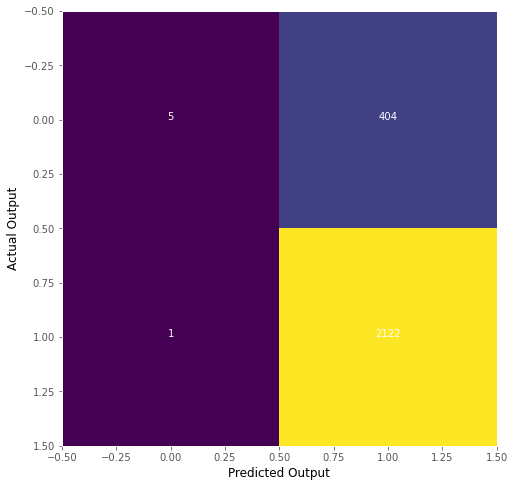

In [27]:
# Plot Confusion Matrix untuk Data Test
print('')
print('Plot Confusion Matrix Data Test:')
print('--------------------------------')
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_test_LR)
ax.grid(False)
ax.set_xlabel('Predicted Output', color='black')
ax.set_ylabel('Actual Output', color='black')
for i in range (len(conf_matrix_test_LR[0])):
    for j in range (len(conf_matrix_test_LR[0])):
        ax.text(j,i,conf_matrix_test_LR[i,j],ha='center',color='white')
plt.show()

Matrix confusion yang terbentuk terdiri dari empat bagian. Dimana:

kiri atas: banyaknya data test yang actualnya bernilai 0 dan hasil prediksinya juga 0

kiri bawah: banyaknya data test yang actualnya bernilai 1 tetapi hasil prediksinya 0

kanan atas: banyaknya data test yang actualnya bernilai 0 tetapi hasil prediksinya 1

kanan bawah: banyaknya data test yang actualnya bernilai 1 dan hasil prediksinya juga 1

Lakukan proses classification untuk kelima model lainnya seperti proses di atas. Model yang digunakan yaitu KNN, Naive Bayes, Decision Tree, Random Forest, dan SVM

In [28]:
model_KNN              = KNeighborsClassifier().fit(x_train,y_train)

y_pred_train_KNN       = model_KNN.predict(x_train)

y_pred_test_KNN        = model_KNN.predict(x_test)

score_train_KNN        = model_KNN.score(x_train,y_train)
print('Performance Model Data Train KNN = ', score_train_KNN)

score_test_KNN         = model_KNN.score(x_test,y_test)
print('Performance Model Data Test KNN = ', score_test_KNN)

print('')
print('Confusion Matrix Data Train:')
print('---------------------------')
print('')
conf_matrix_train_KNN  = confusion_matrix(y_train, y_pred_train_KNN)
print(conf_matrix_train_KNN)

print('')
print('Confusion Matrix Data Test:')
print('---------------------------')
print('')

conf_matrix_test_KNN   = confusion_matrix(y_test, y_pred_test_KNN)
print(conf_matrix_test_KNN)

Performance Model Data Train KNN =  0.9232389730085583
Performance Model Data Test KNN =  0.8886255924170616

Confusion Matrix Data Train:
---------------------------

[[ 837  381]
 [ 202 6175]]

Confusion Matrix Data Test:
---------------------------

[[ 231  178]
 [ 104 2019]]



Plot Confusion Matrix Data Test:
--------------------------------


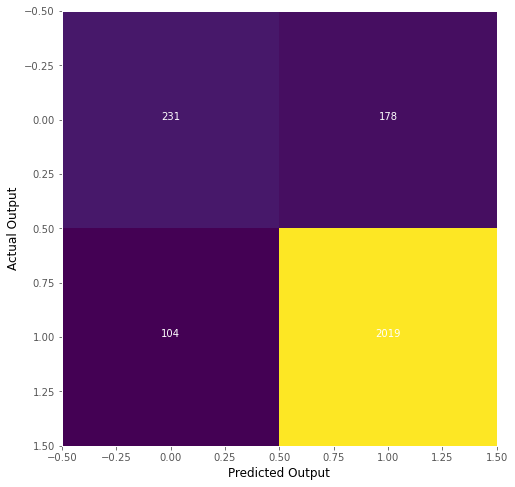

In [29]:
print('')
print('Plot Confusion Matrix Data Test:')
print('--------------------------------')

mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_test_KNN)
ax.grid(False)
ax.set_xlabel('Predicted Output', color='black')
ax.set_ylabel('Actual Output', color='black')
for i in range (len(conf_matrix_test_KNN[0])):
    for j in range (len(conf_matrix_test_KNN[0])):
        ax.text(j,i,conf_matrix_test_KNN[i,j],ha='center',color='white')
plt.show()

In [30]:
model_GNB       = GaussianNB().fit(x_train,y_train)

y_pred_train_GNB       = model_GNB.predict(x_train)

y_pred_test_GNB        = model_GNB.predict(x_test)

score_train_GNB        = model_GNB.score(x_train,y_train)
print('Performance Model Data Train GNB = ', score_train_GNB)

score_test_GNB         = model_GNB.score(x_test,y_test)
print('Performance Model Data Test GNB = ', score_test_GNB)


print('')
print('Confusion Matrix Data Train:')
print('---------------------------')
print('')
conf_matrix_train_GNB  = confusion_matrix(y_train, y_pred_train_GNB)
print(conf_matrix_train_GNB)


print('')
print('Confusion Matrix Data Test:')
print('---------------------------')
print('')
conf_matrix_test_GNB   = confusion_matrix(y_test, y_pred_test_GNB)
print(conf_matrix_test_GNB)

Performance Model Data Train GNB =  0.8400263331138907
Performance Model Data Test GNB =  0.8392575039494471

Confusion Matrix Data Train:
---------------------------

[[   3 1215]
 [   0 6377]]

Confusion Matrix Data Test:
---------------------------

[[   3  406]
 [   1 2122]]



Plot Confusion Matrix Data Test:
--------------------------------


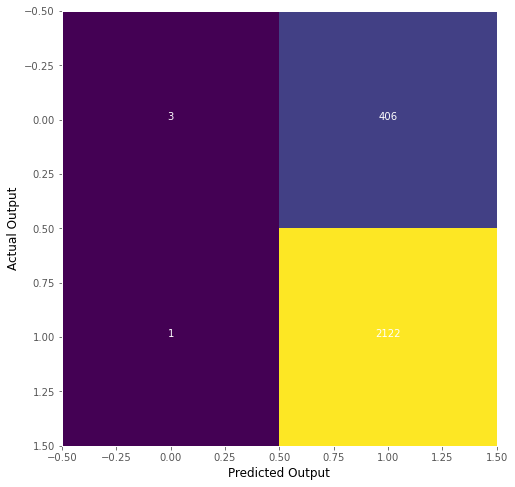

In [31]:
print('')
print('Plot Confusion Matrix Data Test:')
print('--------------------------------')


mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_test_GNB)
ax.grid(False)
ax.set_xlabel('Predicted Output', color='black')
ax.set_ylabel('Actual Output', color='black')
for i in range (len(conf_matrix_test_GNB[0])):
    for j in range (len(conf_matrix_test_GNB[0])):
        ax.text(j,i,conf_matrix_test_GNB[i,j],ha='center',color='white')
plt.show()

In [32]:
model_DT              = DecisionTreeClassifier().fit(x_train,y_train)

y_pred_train_DT       = model_DT.predict(x_train)

y_pred_test_DT        = model_DT.predict(x_test)

score_train_DT        = model_DT.score(x_train,y_train)
print('Performance Model Data Train DT = ', score_train_DT)

score_test_DT         = model_DT.score(x_test,y_test)
print('Performance Model Data Test DT = ', score_test_DT)

print('')
print('Confusion Matrix Data Train:')
print('---------------------------')
print('')
conf_matrix_train_DT  = confusion_matrix(y_train, y_pred_train_DT)
print(conf_matrix_train_DT)

print('')
print('Confusion Matrix Data Test:')
print('---------------------------')
print('')
conf_matrix_test_DT   = confusion_matrix(y_test, y_pred_test_DT)
print(conf_matrix_test_DT)

Performance Model Data Train DT =  1.0
Performance Model Data Test DT =  0.8834913112164297

Confusion Matrix Data Train:
---------------------------

[[1218    0]
 [   0 6377]]

Confusion Matrix Data Test:
---------------------------

[[ 276  133]
 [ 162 1961]]



Plot Confusion Matrix Data Test:
--------------------------------


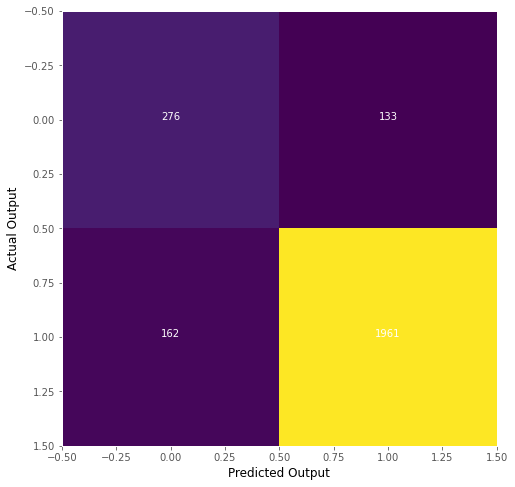

In [33]:
print('')
print('Plot Confusion Matrix Data Test:')
print('--------------------------------')

mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_test_DT)
ax.grid(False)
ax.set_xlabel('Predicted Output', color='black')
ax.set_ylabel('Actual Output', color='black')
for i in range (len(conf_matrix_test_DT[0])):
    for j in range (len(conf_matrix_test_DT[0])):
        ax.text(j,i,conf_matrix_test_DT[i,j],ha='center',color='white')
plt.show()

In [34]:
model_RF              = RandomForestClassifier().fit(x_train,y_train)

y_pred_train_RF       = model_RF.predict(x_train)

y_pred_test_RF        = model_RF.predict(x_test)

score_train_RF        = model_RF.score(x_train,y_train)
print('Performance Model Data Train RF = ', score_train_RF)

score_test_RF         = model_RF.score(x_test,y_test)
print('Performance Model Data Test RF = ', score_test_RF)

print('')
print('Confusion Matrix Data Train:')
print('---------------------------')
print('')
conf_matrix_train_RF  = confusion_matrix(y_train, y_pred_train_RF)
print(conf_matrix_train_RF)

print('')
print('Confusion Matrix Data Test:')
print('---------------------------')
print('')
conf_matrix_test_RF   = confusion_matrix(y_test, y_pred_test_RF)
print(conf_matrix_test_RF)

Performance Model Data Train RF =  1.0
Performance Model Data Test RF =  0.9253554502369669

Confusion Matrix Data Train:
---------------------------

[[1218    0]
 [   0 6377]]

Confusion Matrix Data Test:
---------------------------

[[ 280  129]
 [  60 2063]]



Plot Confusion Matrix Data Test:
--------------------------------


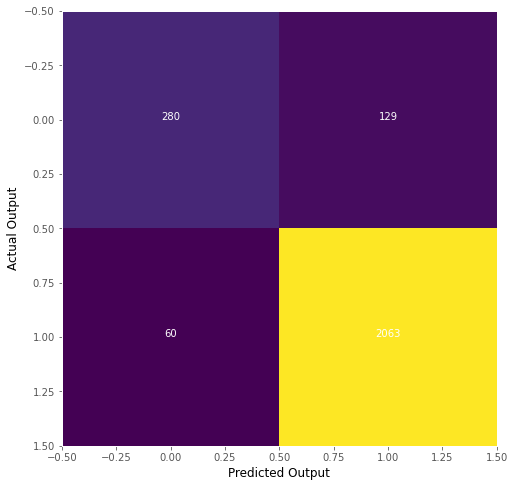

In [35]:
print('')
print('Plot Confusion Matrix Data Test:')
print('--------------------------------')


mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_test_RF)
ax.grid(False)
ax.set_xlabel('Predicted Output', color='black')
ax.set_ylabel('Actual Output', color='black')
for i in range (len(conf_matrix_test_RF[0])):
    for j in range (len(conf_matrix_test_RF[0])):
        ax.text(j,i,conf_matrix_test_RF[i,j],ha='center',color='white')
plt.show()

In [36]:
model_SVM              = svm.SVC().fit(x_train,y_train)

y_pred_train_SVM       = model_SVM.predict(x_train)

y_pred_test_SVM        = model_SVM.predict(x_test)

score_train_SVM        = model_SVM.score(x_train,y_train)
print('Performance Model Data Train SVM = ', score_train_SVM)

score_test_SVM         = model_SVM.score(x_test,y_test)
print('Performance Model Data Test SVM = ', score_test_SVM)


print('')
print('Confusion Matrix Data Train:')
print('---------------------------')
print('')
conf_matrix_train_SVM  = confusion_matrix(y_train, y_pred_train_SVM)
print(conf_matrix_train_SVM)

print('')
print('Confusion Matrix Data Test:')
print('---------------------------')
print('')
conf_matrix_test_SVM   = confusion_matrix(y_test, y_pred_test_SVM)
print(conf_matrix_test_SVM)

Performance Model Data Train SVM =  0.83963133640553
Performance Model Data Test SVM =  0.8384676145339652

Confusion Matrix Data Train:
---------------------------

[[   0 1218]
 [   0 6377]]

Confusion Matrix Data Test:
---------------------------

[[   0  409]
 [   0 2123]]



Plot Confusion Matrix Data Test:
--------------------------------


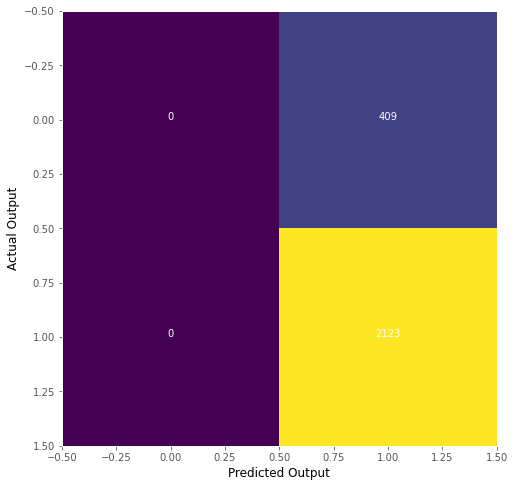

In [37]:
print('')
print('Plot Confusion Matrix Data Test:')
print('--------------------------------')


mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_test_SVM)
ax.grid(False)
ax.set_xlabel('Predicted Output', color='black')
ax.set_ylabel('Actual Output', color='black')
for i in range (len(conf_matrix_test_SVM[0])):
    for j in range (len(conf_matrix_test_SVM[0])):
        ax.text(j,i,conf_matrix_test_SVM[i,j],ha='center',color='white')
plt.show()

In [38]:
print('Hasil Score 6 Model Classification')
print('===================================')


rekap_score = {'Model':['Logistic Regression','KNN','Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM'], 
        'Score Data Train':[score_train_LR, score_train_KNN, score_train_GNB, score_train_DT, score_train_RF, score_train_SVM],'Score Data Test':[score_test_LR, score_test_KNN, score_test_GNB, score_test_DT, score_test_RF, score_test_SVM]} 
output_rekap_score = pd.DataFrame(rekap_score)
output_rekap_score

Hasil Score 6 Model Classification


,Model,Score Data Train,Score Data Test
0,Logistic Regression,0.842528,0.840047
1,KNN,0.923239,0.888626
2,Naive Bayes,0.840026,0.839258
3,Decision Tree,1.000000,0.883491
4,Random Forest,1.000000,0.925355
5,SVM,0.839631,0.838468


In [39]:
print('Kesimpulan:')
print('===========')
print('Setelah dilakukan classification menggunakan 6 model classification diperoleh score dari data train yang paling tinggi adalah model Decison Tree',score_train_DT, 'dan Random Forest',score_train_RF)
print('Namun ketika data test di input ke dalam model-model tersebut, nilai score yang paling tinggi adalah model Random Forest,')
print('yaitu sebesar', score_test_RF)
print('Sehingga model yang akan digunakan untuk memprediksi churn customer adalah model Random Forest')
print('')
print('Ket: ')
print('0 = Churn/Attrited Customer')
print('1 = Existing Customer')

Kesimpulan:
Setelah dilakukan classification menggunakan 6 model classification diperoleh score dari data train yang paling tinggi adalah model Decison Tree 1.0 dan Random Forest 1.0
Namun ketika data test di input ke dalam model-model tersebut, nilai score yang paling tinggi adalah model Random Forest,
yaitu sebesar 0.9253554502369669
Sehingga model yang akan digunakan untuk memprediksi churn customer adalah model Random Forest

Ket: 
0 = Churn/Attrited Customer
1 = Existing Customer


In [40]:
import pickle
pickle.dump(model_RF,open('./model_classification.pkl','wb'))
model = pickle.load(open('./model_classification.pkl','rb'))

In [41]:
print('Data Feature yang digunakan untuk case ini adalah:')
print('1. Customer_Age: Customer Age')
print('2. Credit_Limit: Credit Limit pada Kartu Kredit')
print('3. Total_Revolving_Bal: Total Revolving Balance pada Kartu Kredit')
print('4. Total_Trans_Amt: Total Transaction Amount 12 Bulan')
print('5. Card_Category_Konversi: Jenis Kartu')
print('6. Income_Category_Konversi: Income Category')

Data Feature yang digunakan untuk case ini adalah:
1. Customer_Age: Customer Age
2. Credit_Limit: Credit Limit pada Kartu Kredit
3. Total_Revolving_Bal: Total Revolving Balance pada Kartu Kredit
4. Total_Trans_Amt: Total Transaction Amount 12 Bulan
5. Card_Category_Konversi: Jenis Kartu
6. Income_Category_Konversi: Income Category


In [42]:
data_input = np.array([35,1000,1000,1000,0,0]).reshape(1,-1)
#data_input = np.array([35,10000,5000,1000,1,1]).reshape(1,-1)
print('Shape Data Input',data_input.shape)
print('---------------------------------')
prediksi = model.predict(data_input)
print('Hasil Prediksi: ', prediksi)
print('---------------------------------')
if prediksi == 0:
    print("Customer Flag: Attrited Customer/Churn Customer")
else:
    print("Customer Flag: Existing Customer")


Shape Data Input (1, 6)
---------------------------------
Hasil Prediksi:  [1]
---------------------------------
Customer Flag: Existing Customer
